In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
file_path = 'cancer.csv'
df = pd.read_csv(file_path, delimiter=';')
df.head()

,Patient_ID,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,...,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,Risk_Level
0,LU0000,Breast,68,0,7,2,8,0,5,3,...,4,6,3,1,0,0,0.398696,28.0,5,Medium
1,LU0001,Prostate,74,1,8,9,8,0,0,3,...,1,3,3,0,0,5,0.424299,25.4,9,Medium
2,LU0002,Skin,55,1,7,10,7,0,3,3,...,1,8,10,0,0,6,0.605082,28.6,2,Medium
3,LU0003,Colon,61,0,6,2,2,0,6,2,...,6,4,8,0,0,8,0.318449,32.1,7,Low
4,LU0004,Lung,67,1,10,7,4,0,6,3,...,9,10,9,0,0,5,0.524358,25.1,2,Medium


In [3]:

# Handling missing values
def handle_missing_values(df, num_cols_ex_age, cat_cols):
    df = df.copy()

    # Impute numerical columns with mean (excluding 'Age')
    if len(num_cols_ex_age) > 0:
        num_imputer = SimpleImputer(strategy='mean')
        df[num_cols_ex_age] = num_imputer.fit_transform(df[num_cols_ex_age])

    # Impute categorical columns with mode
    if len(cat_cols) > 0:
        cat_imputer = SimpleImputer(strategy='most_frequent')
        df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    return df

# Preprocessing data
numerical_cols_all = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

numerical_cols_ex_age = [col for col in numerical_cols_all if col != 'Age']

# Apply missing values handling
df = handle_missing_values(df, numerical_cols_ex_age, categorical_cols)
df.head()

,Patient_ID,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,...,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,Risk_Level
0,LU0000,Breast,68,0.0,7.0,2.0,8.0,0.0,5.0,3.0,...,4.0,6.0,3.0,1.0,0.0,0.0,0.398696,28.0,5.0,Medium
1,LU0001,Prostate,74,1.0,8.0,9.0,8.0,0.0,0.0,3.0,...,1.0,3.0,3.0,0.0,0.0,5.0,0.424299,25.4,9.0,Medium
2,LU0002,Skin,55,1.0,7.0,10.0,7.0,0.0,3.0,3.0,...,1.0,8.0,10.0,0.0,0.0,6.0,0.605082,28.6,2.0,Medium
3,LU0003,Colon,61,0.0,6.0,2.0,2.0,0.0,6.0,2.0,...,6.0,4.0,8.0,0.0,0.0,8.0,0.318449,32.1,7.0,Low
4,LU0004,Lung,67,1.0,10.0,7.0,4.0,0.0,6.0,3.0,...,9.0,10.0,9.0,0.0,0.0,5.0,0.524358,25.1,2.0,Medium


In [4]:

# Handling Outliers using IQR method
def handle_outliers(df, numerical_cols_excluding_age):
    df = df.copy()
    
    Q1 = df[numerical_cols_excluding_age].quantile(0.25)
    Q3 = df[numerical_cols_excluding_age].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap outliers
    for col in numerical_cols_excluding_age:
        df[col] = np.where(df[col] < lower[col], lower[col], df[col])
        df[col] = np.where(df[col] > upper[col], upper[col], df[col])

    return df

# Apply outlier handling
df = handle_outliers(df, numerical_cols_ex_age)
df.head()

,Patient_ID,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,...,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,Risk_Level
0,LU0000,Breast,68,0.0,7.0,2.0,8.0,0.0,5.0,3.0,...,4.0,6.0,3.0,0.0,0.0,0.0,0.398696,28.0,5.0,Medium
1,LU0001,Prostate,74,1.0,8.0,9.0,8.0,0.0,0.0,3.0,...,1.0,3.0,3.0,0.0,0.0,5.0,0.424299,25.4,9.0,Medium
2,LU0002,Skin,55,1.0,7.0,10.0,7.0,0.0,3.0,3.0,...,1.0,8.0,10.0,0.0,0.0,6.0,0.605082,28.6,2.0,Medium
3,LU0003,Colon,61,0.0,6.0,2.0,2.0,0.0,6.0,2.0,...,6.0,4.0,8.0,0.0,0.0,8.0,0.318449,32.1,7.0,Low
4,LU0004,Lung,67,1.0,10.0,7.0,4.0,0.0,6.0,3.0,...,9.0,10.0,9.0,0.0,0.0,5.0,0.524358,25.1,2.0,Medium


In [5]:

# Feature Scaling using StandardScaler
def scale_features(df, numerical_cols_excluding_age):
    df = df.copy()
    
    scaler = StandardScaler()
    df[numerical_cols_excluding_age] = scaler.fit_transform(df[numerical_cols_excluding_age])

    return df

# Apply scaling
df = scale_features(df, numerical_cols_ex_age)
df.head()

,Patient_ID,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,...,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,Risk_Level
0,LU0000,Breast,68,-0.978237,0.554368,-0.930930,0.664079,0.0,-0.060089,-0.506388,...,-0.005037,0.211123,-0.616109,0.0,0.0,-1.292769,-0.454229,0.464059,0.019430,Medium
1,LU0001,Prostate,74,1.022247,0.855164,1.216190,0.664079,0.0,-1.645547,-0.506388,...,-1.012522,-0.724430,-0.616109,0.0,0.0,0.347593,-0.245673,-0.199046,1.283159,Medium
2,LU0002,Skin,55,1.022247,0.554368,1.522922,0.337349,0.0,-0.694272,-0.506388,...,-1.012522,0.834825,1.563154,0.0,0.0,0.675665,1.226948,0.617084,-0.928367,Medium
3,LU0003,Colon,61,-0.978237,0.253571,-0.930930,-1.296303,0.0,0.257003,-0.830270,...,0.666619,-0.412579,0.940507,0.0,0.0,1.331810,-1.107907,1.509726,0.651294,Low
4,LU0004,Lung,67,1.022247,1.456757,0.602727,-0.642842,0.0,0.257003,-0.506388,...,1.674104,1.458527,1.251831,0.0,0.0,0.347593,0.569389,-0.275559,-0.928367,Medium


In [6]:
from sklearn.preprocessing import OneHotEncoder

def encode_categoricals(df, categorical_cols):
    df = df.copy()
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_categorical = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
    df_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_categorical], axis=1)
    return df_encoded
df = encode_categoricals(df, categorical_cols)
df.head()

,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,Fruit_Veg_Intake,Physical_Activity,...,Patient_ID_ST0396,Patient_ID_ST0397,Patient_ID_ST0398,Patient_ID_ST0399,Cancer_Type_Colon,Cancer_Type_Lung,Cancer_Type_Prostate,Cancer_Type_Skin,Risk_Level_Low,Risk_Level_Medium
0,68,-0.978237,0.554368,-0.930930,0.664079,0.0,-0.060089,-0.506388,0.680726,-0.005037,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,74,1.022247,0.855164,1.216190,0.664079,0.0,-1.645547,-0.506388,0.680726,-1.012522,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,55,1.022247,0.554368,1.522922,0.337349,0.0,-0.694272,-0.506388,-0.304643,-1.012522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,61,-0.978237,0.253571,-0.930930,-1.296303,0.0,0.257003,-0.830270,-0.304643,0.666619,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,67,1.022247,1.456757,0.602727,-0.642842,0.0,0.257003,-0.506388,1.666096,1.674104,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [7]:

# Apply PCA (Feature Reduction)
def apply_pca(df, numerical_cols_excluding_age, n_components=5):
    df = df.copy()

    pca = PCA(n_components=n_components)
    pca_features = pca.fit_transform(df[numerical_cols_excluding_age])

    # Create DataFrame with PCA features
    pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca_features.shape[1])])

    # Combine PCA features with the rest of the dataset
    df_final = pd.concat([df.drop(columns=numerical_cols_excluding_age), pca_df], axis=1)

    return df_final

# Apply PCA
df_final = apply_pca(df, numerical_cols_ex_age, n_components=5)
df_final.head()

,Age,Patient_ID_BR0001,Patient_ID_BR0002,Patient_ID_BR0003,Patient_ID_BR0004,Patient_ID_BR0005,Patient_ID_BR0006,Patient_ID_BR0007,Patient_ID_BR0008,Patient_ID_BR0009,...,Cancer_Type_Lung,Cancer_Type_Prostate,Cancer_Type_Skin,Risk_Level_Low,Risk_Level_Medium,PC1,PC2,PC3,PC4,PC5
0,68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.770855,-1.033844,-1.052917,-0.347808,0.315670
1,74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,-0.324764,-1.569572,0.184762,0.833150,-0.062836
2,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.998017,-0.572965,0.411084,1.129145,-1.488189
3,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-0.673671,0.185617,1.237845,0.765176,1.414589
4,67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.974097,-1.833425,1.423228,0.451595,0.060609


In [8]:

# Pearson Correlation and Confidence Interval
bmi = df['BMI']
risk_score = df['Overall_Risk_Score']

# Pearson correlation
pearson_corr, p_value_pearson = stats.pearsonr(bmi, risk_score)

# Confidence Interval for Pearson correlation (using Fisher transformation)
z = 0.5 * np.log((1 + pearson_corr) / (1 - pearson_corr))  # Fisher transformation
se = 1 / np.sqrt(len(bmi) - 3)  # Standard error for the transformed correlation
z_critical = stats.norm.ppf(0.975)  # 95% Confidence Interval (z-critical for 2-tailed)
z_lower = z - z_critical * se
z_upper = z + z_critical * se

# Inverse Fisher transformation to get correlation bounds
r_lower = (np.exp(2 * z_lower) - 1) / (np.exp(2 * z_lower) + 1)
r_upper = (np.exp(2 * z_upper) - 1) / (np.exp(2 * z_upper) + 1)

# Output for Pearson correlation
print("Uji Parametrik: Pearson Correlation")
print(f"Pearson Correlation: {pearson_corr:.3f}")
print(f"p-value: {p_value_pearson:.3f}")
print(f"95% Confidence Interval: ({r_lower:.3f}, {r_upper:.3f})")


Uji Parametrik: Pearson Correlation
Pearson Correlation: 0.037
p-value: 0.102
95% Confidence Interval: (-0.007, 0.080)


In [9]:
# Kruskal-Wallis Test to compare risk scores across cancer types
cancer_types = df['Cancer_Type']
unique_cancer_types = cancer_types.unique()

# Collect risk scores for each cancer type
risk_scores_by_cancer_type = [df['Overall_Risk_Score'][cancer_types == cancer_type] for cancer_type in unique_cancer_types]

# Kruskal-Wallis test
kruskal_stat, p_value_kruskal = stats.kruskal(*risk_scores_by_cancer_type)

# Output for Kruskal-Wallis test
print("Uji Non-Parametrik: Kruskal-Wallis Test")
print(f"Kruskal-Wallis H-statistic: {kruskal_stat:.3f}")
print(f"p-value: {p_value_kruskal:.3f}")


Uji Non-Parametrik: Kruskal-Wallis Test
Kruskal-Wallis H-statistic: 167.212
p-value: 0.000


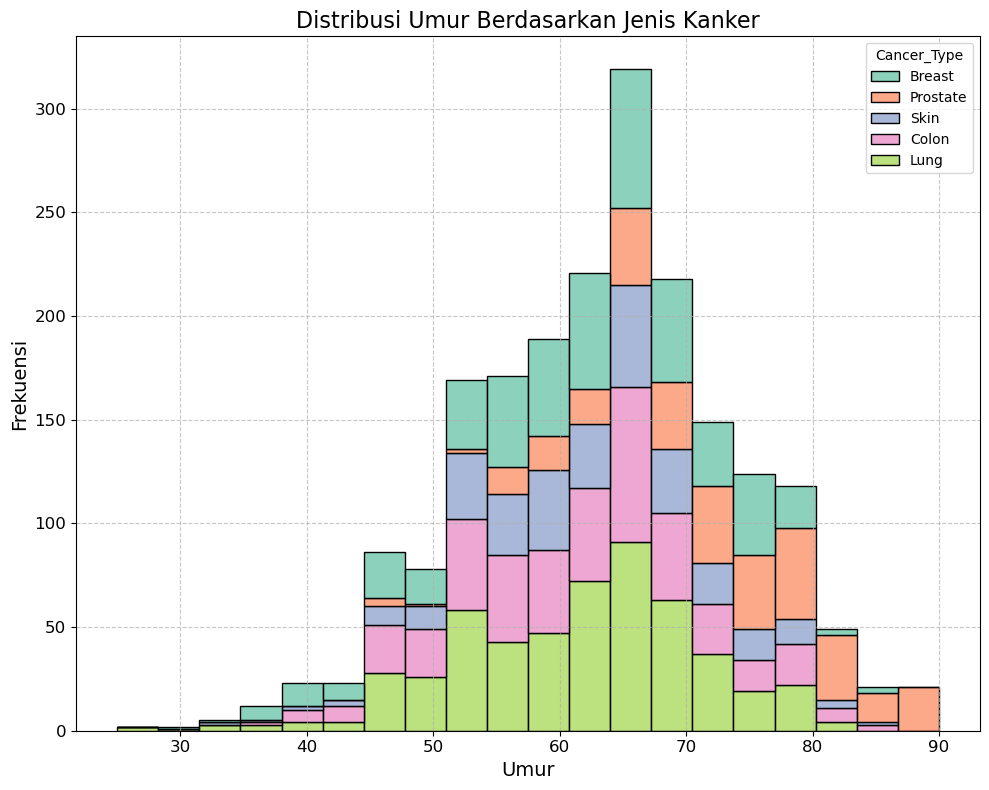

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca file yang diunggah langsung dengan nama 'cancer.csv'
df = pd.read_csv('cancer.csv')

# Filter out invalid ages (negative or >100)
valid_age = df["Age"].loc[(df["Age"] >= 0) & (df["Age"] <= 100)]

# Plotting the histogram by Cancer Type
plt.figure(figsize=(10, 8))

# Menggunakan seaborn untuk membuat histogram berdasarkan jenis kanker
sns.histplot(data=df, x="Age", hue="Cancer_Type", multiple="stack", bins=20, palette="Set2", kde=False)

plt.title("Distribusi Umur Berdasarkan Jenis Kanker", fontsize=16)
plt.xlabel("Umur", fontsize=14)
plt.ylabel("Frekuensi", fontsize=14)

# Memperbaiki tampilan grid dan tick marks
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()  # Menyesuaikan layout agar semua elemen terlihat dengan baik
plt.show()


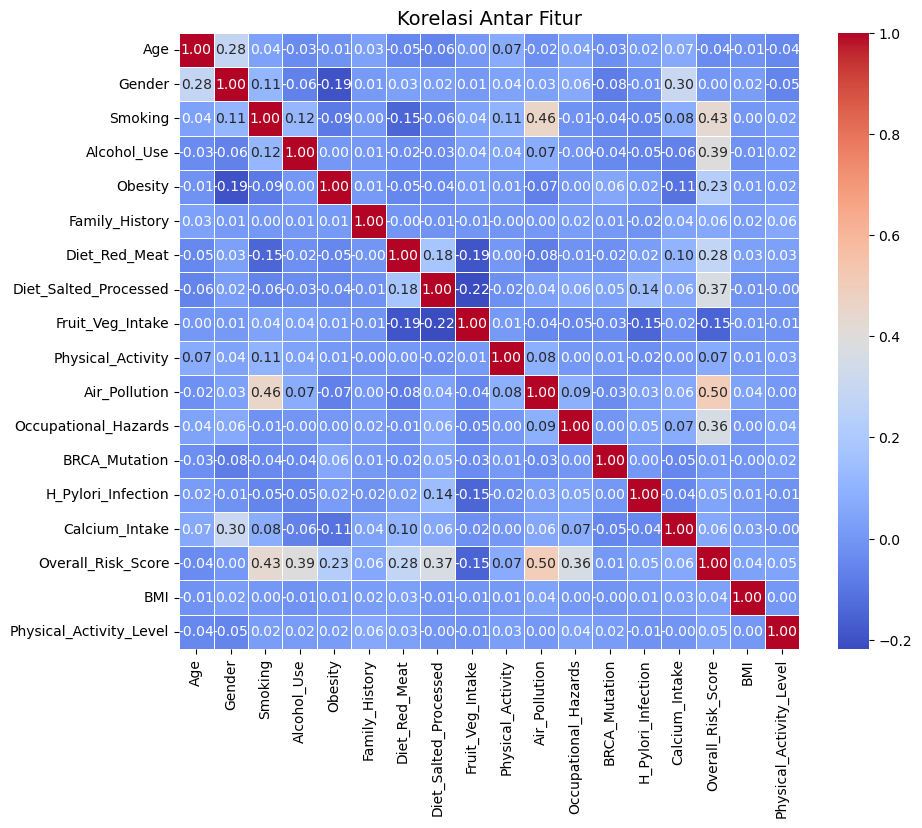

In [8]:
# Ensure necessary libraries are imported
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns from the dataframe
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and show the plot
plt.title('Korelasi Antar Fitur', fontsize=14)
plt.show()


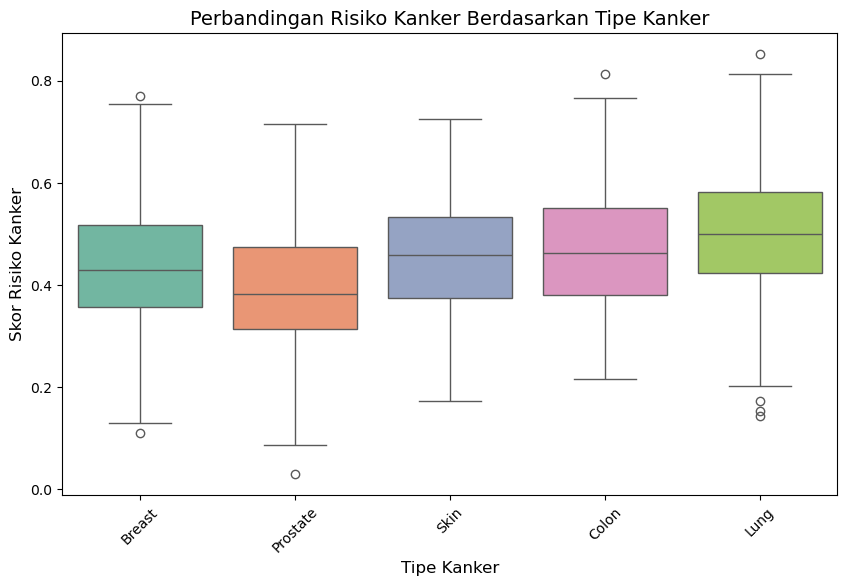

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='Cancer_Type', y='Overall_Risk_Score', data=df, hue='Cancer_Type', palette='Set2', dodge=False)

plt.title('Perbandingan Risiko Kanker Berdasarkan Tipe Kanker', fontsize=14)
plt.xlabel('Tipe Kanker', fontsize=12)
plt.ylabel('Skor Risiko Kanker', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [3]:
import numpy as np
from scipy import stats

# 1. Uji Parametrik - Pearson Correlation antara BMI dan Overall_Risk_Score
bmi = df['BMI']
risk_score = df['Overall_Risk_Score']

# Pearson correlation
pearson_corr, p_value_pearson = stats.pearsonr(bmi, risk_score)

# Menghitung Confidence Interval untuk Pearson correlation (menggunakan Fisher transformation)
z = 0.5 * np.log((1 + pearson_corr) / (1 - pearson_corr))  # Fisher transformation
se = 1 / np.sqrt(len(bmi) - 3)  # Standard error for the transformed correlation
z_critical = stats.norm.ppf(0.975)  # 95% Confidence Interval (z-critical for 2-tailed)
z_lower = z - z_critical * se
z_upper = z + z_critical * se

# Inverse Fisher transformation to get correlation bounds
r_lower = (np.exp(2 * z_lower) - 1) / (np.exp(2 * z_lower) + 1)
r_upper = (np.exp(2 * z_upper) - 1) / (np.exp(2 * z_upper) + 1)

# Output untuk Pearson correlation
print("Uji Parametrik: Pearson Correlation")
print(f"Pearson Correlation: {pearson_corr:.3f}")
print(f"p-value: {p_value_pearson:.3f}")
print(f"95% Confidence Interval: ({r_lower:.3f}, {r_upper:.3f})")
print("\n")

# 2. Uji Non-Parametrik - Kruskal-Wallis Test untuk membandingkan Risiko Kanker antara Tipe Kanker
# Mengelompokkan skor risiko berdasarkan tipe kanker
cancer_types = df['Cancer_Type']
unique_cancer_types = cancer_types.unique()

# Menyaring skor risiko untuk setiap tipe kanker
risk_scores_by_cancer_type = [df['Overall_Risk_Score'][cancer_types == cancer_type] for cancer_type in unique_cancer_types]

# Kruskal-Wallis test
kruskal_stat, p_value_kruskal = stats.kruskal(*risk_scores_by_cancer_type)

# Output untuk Kruskal-Wallis test
print("Uji Non-Parametrik: Kruskal-Wallis Test")
print(f"Kruskal-Wallis H-statistic: {kruskal_stat:.3f}")
print(f"p-value: {p_value_kruskal:.3f}")


Uji Parametrik: Pearson Correlation
Pearson Correlation: 0.037
p-value: 0.097
95% Confidence Interval: (-0.007, 0.081)


Uji Non-Parametrik: Kruskal-Wallis Test
Kruskal-Wallis H-statistic: 167.212
p-value: 0.000


Descriptive Statistics:
                Age       Gender      Smoking  Alcohol_Use      Obesity  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean     63.248000     0.489000     5.157000     5.035000     5.967500   
std      10.462946     0.500004     3.325339     3.260996     3.061393   
min      25.000000     0.000000     0.000000     0.000000     0.000000   
25%      56.000000     0.000000     2.000000     2.000000     4.000000   
50%      64.000000     0.000000     5.000000     5.000000     6.000000   
75%      70.000000     1.000000     8.000000     8.000000     9.000000   
max      90.000000     1.000000    10.000000    10.000000    10.000000   

       Family_History  Diet_Red_Meat  Diet_Salted_Processed  Fruit_Veg_Intake  \
count     2000.000000    2000.000000            2000.000000       2000.000000   
mean         0.194500       5.189500               4.563500          4.927500   
std          0.395914       3.154452               3.088323      

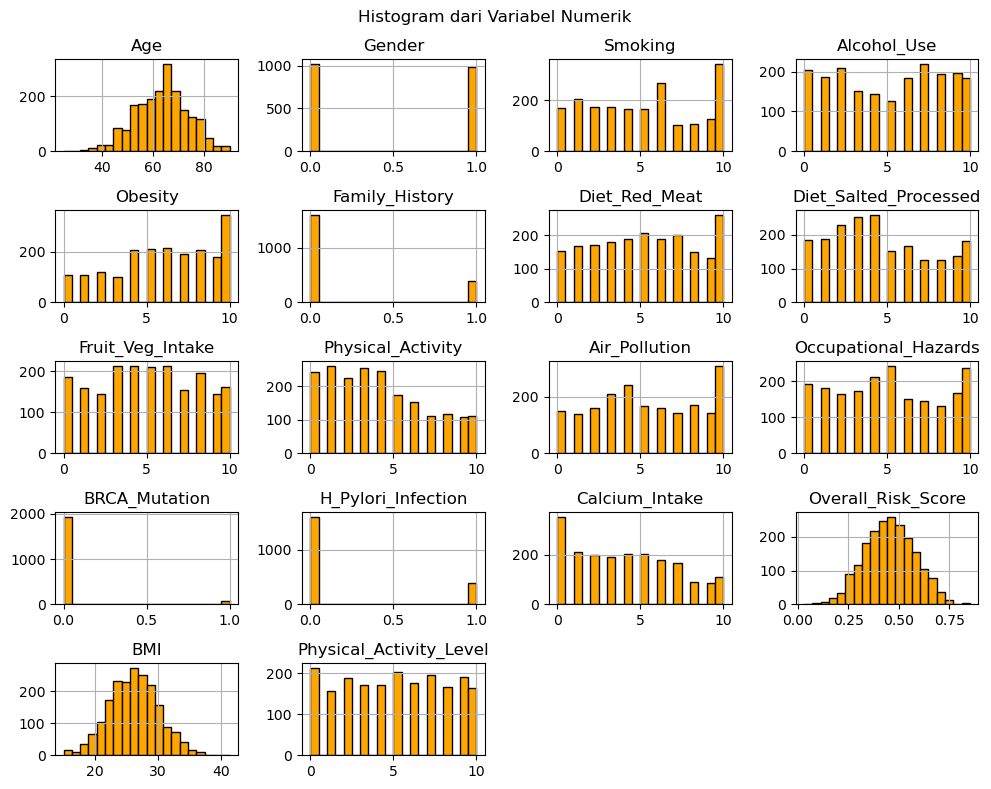

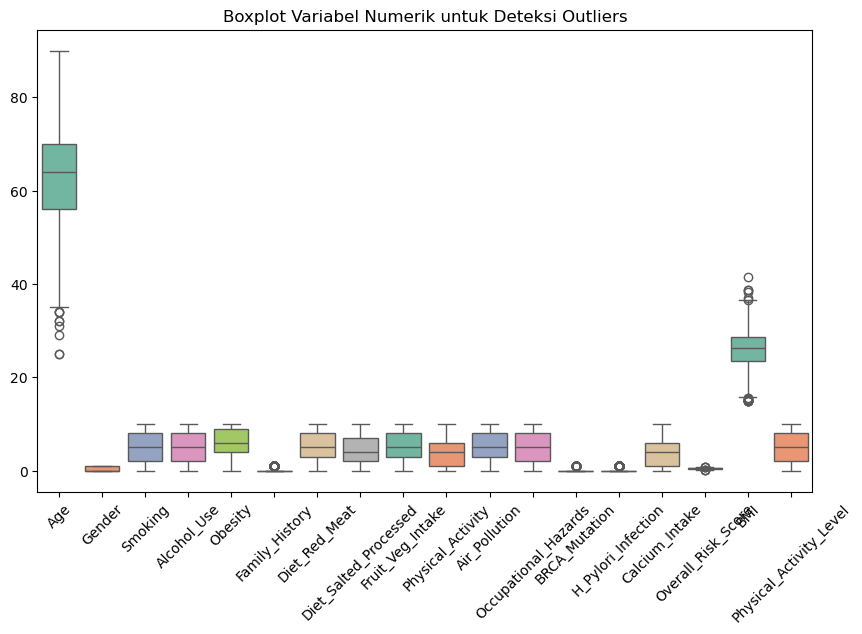

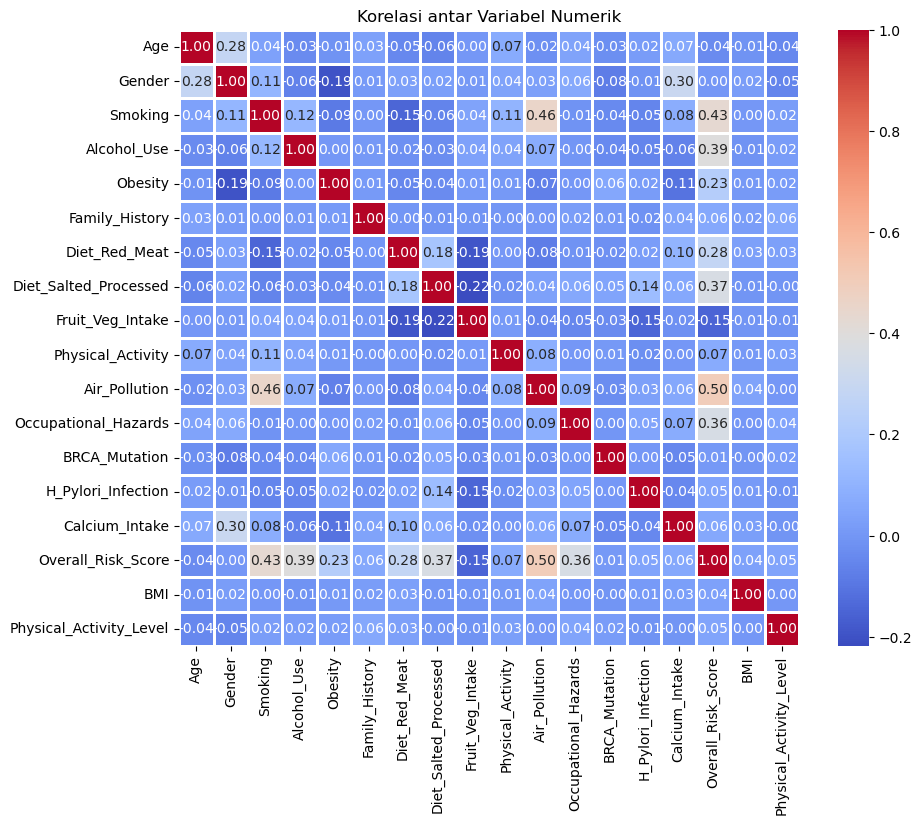

,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,Fruit_Veg_Intake,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000
mean,63.248000,0.489000,5.157000,5.035000,5.967500,0.194500,5.189500,4.563500,4.927500,4.015000,5.323000,4.979000,0.032500,0.19650,3.94050,0.454449,26.183350,4.938500
std,10.462946,0.500004,3.325339,3.260996,3.061393,0.395914,3.154452,3.088323,3.045305,2.978458,3.207462,3.212899,0.177368,0.39745,3.04887,0.123074,3.947459,3.166027
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.029285,15.000000,0.000000
25%,56.000000,0.000000,2.000000,2.000000,4.000000,0.000000,3.000000,2.000000,3.000000,1.000000,3.000000,2.000000,0.000000,0.00000,1.00000,0.366982,23.500000,2.000000
50%,64.000000,0.000000,5.000000,5.000000,6.000000,0.000000,5.000000,4.000000,5.000000,4.000000,5.000000,5.000000,0.000000,0.00000,4.00000,0.455399,26.200000,5.000000
75%,70.000000,1.000000,8.000000,8.000000,9.000000,0.000000,8.000000,7.000000,8.000000,6.000000,8.000000,8.000000,0.000000,0.00000,6.00000,0.539782,28.700000,8.000000
max,90.000000,1.000000,10.000000,10.000000,10.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.00000,10.00000,0.852158,41.400000,10.000000


In [7]:
# EDA
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('cancer.csv')

# 1. Descriptive Statistics
# Displaying basic statistics like mean, median, standard deviation, and range
desc_stats = df.describe()
print("Descriptive Statistics:\n", desc_stats)

# 2. Data Visualization

# Histogram for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols].hist(figsize=(10, 8), bins=20, color='orange', edgecolor='black')
plt.suptitle("Histogram dari Variabel Numerik")
plt.tight_layout()
plt.show()

# Boxplot for detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols], palette="Set2")
plt.title("Boxplot Variabel Numerik untuk Deteksi Outliers")
plt.xticks(rotation=45)
plt.show()

# 3. Correlation Analysis

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title("Korelasi antar Variabel Numerik")
plt.show()

desc_stats
